In [34]:
import pandas as pd
import requests
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns


Generative AI:

The use of AI in this assignment was used to look up panda's functions and used to understand what possible diagrams can be created in seaborn and matplot libraries. The use of AI was used to see what libraries I can access and load into the jupiter notebook.

url to github: https://github.com/danielbanafshei01/MN5813/tree/main


Introduction:

In this project we will analyse transactional sales data to investigate overall performance of the retail-based company. The are three main aims we will investigate in this project are:

1- To investigate sales performance through analysing the performance of revenue and products.  

2- To analyse export countries and to determine which country generate the highest value for the company.

3- To evaluate customer purchasing behaviour in the UK overtime.

Review:

It is important to note the definition of big data within this project. It refers to a large data set and according to Bradlow et al. (2017,p.80) there are 5 characteristics in big data within retail which are:'customer, channel, product, location and time.' This framework is important in retail data sets to discuss the all aspects of customer behaviour. Within existing literature consumer behaviour can be better understood through 'grouped statistics such as purchasing trends by product category and customer age' (Chakma, Chakma and Chakma,2025,p.258). This approach aligns with our methodology set up as as our data set is similarly grouped and shows trends across products and countries.  


Data management: 

The retail data set is found on kaggle(Ulrik Thyge Pedersen, 2022). The data is loaded in to github and a request feature and to find and located the file available in my github. The data set was converted to a zipfile initally as data set is very large, and in the jupiter notebook it is read through the zipfile library and loaded in.
In this stage I will discuss how I cleaned, wrangled and analysed the retail dataframe.
The data is cleaned through the following steps: 

- Duplicates are deleted

- Descriptions are cleaned and sorted through matching with the most common description to stockcode. 

- Customer ID is sorted and nan values are filled with place holder values of 0.

- Time of invoice dates are removed and is converted to time series.

- Countries are examined are unknown countries are filtered into other category.

After the data is cleaned the data is preprocessed in multiple ways:

- Revenue added to dataframe as alot of analysis is needed to track financial performances.

- Invoice dates were aggregated to see performances overtime.

 





Method:

The project includes visual analytics to discover any trends that are relevant to the aims described above, in this section we will dive deeper in the analytic techniques used.

- Aggregation of different data was grouped together such as by product, country and customerID for comparative analysis.
- Scatter chart was used to compare individual transactions against quantity sold.
- time series analysis and line charts were used to spot any trends overtime.
- Bar chart was used to identify most popular items in export countries.
- Bubble chart was used for a country level comparison where the size of each bubble represents the amount of unique customers per country.

These charts were used to give clear understanding of what each analysis means and paints a clear picture towards possible stakeholders to understand where they need to possibly improve.
  



In [2]:
url = "https://github.com/danielbanafshei01/MN5813/raw/main/online_retail.csv.zip"

zipfile = zipfile.ZipFile(io.BytesIO(requests.get(url).content))
df = pd.read_csv(zipfile.open
                 (zipfile.namelist()[0]))

df.head()
#The data set of customer preference is loaded in and the first 5 rows are displayed


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.isnull().any()
# Displays the columns in our data set and to check if there are any NAN values in any columns 


InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [4]:
print('Number of duplicated data:')
df.duplicated().sum()
#Checks for duplicated data and returns how many duplicates there are

Number of duplicated data:


5268

In [5]:
df['Description']=df['Description'].fillna('Product Unknown')
df['CustomerID']= df['CustomerID'].fillna(0)
#Nan values in categories have been replaced with placeholders
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce').dt.date
#time of invoice date removed
df['Revenue']=df['Quantity']*df['UnitPrice']
#added revenue to data frame

In [6]:
df.loc[df['StockCode'] == '85123A', 'Description'].unique()


array(['WHITE HANGING HEART T-LIGHT HOLDER', '?',
       'wrongly marked carton 22804',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

Descriptions are messy, the next logical step to clean description is by matching it with the most frequent stock code 

In [7]:
sorted_descriptions = (
    df.groupby(['StockCode', 'Description'])
      .size()
      .reset_index(name='count')
      .sort_values(['StockCode', 'count'], ascending=[True, False])
      .drop_duplicates(subset=['StockCode'])
      .set_index('StockCode')['Description']
)

df['Description'] = df['StockCode'].map(
    sorted_descriptions.to_dict())






In [8]:
df.loc[df['StockCode'] == '85123A', 'Description'].unique()
#check to see if code worked

array(['WHITE HANGING HEART T-LIGHT HOLDER'], dtype=object)

In [9]:
df=df.drop_duplicates()
#duplicates are dropped 

In [10]:
# View all unique countries in the data set
print(df['Country'].unique())



['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


There are two categories in country which are: unspecified and European community. The best case situation is to combine these countries into an 'other' category as dropping them may skew the data 

In [11]:
df['Country']= df['Country'].replace({
    'Unspecified': 'Other',
    'European Community': 'Other'
})
#combined the categories into 'Other'
df['Country']=df['Country'].replace('EIRE','Ireland')
#replace the country code of EIRE to correct country name of Ireland

In [12]:

top_sold = (
    df['StockCode']
        .value_counts()
        .reset_index(name='Amount')
        .rename(columns = {'index': ['StockCode']})
    .head(10)
)
#This shows the top 10 most sold products by individual transaction 
top_sold['Description']=top_sold['StockCode'].map(sorted_descriptions)
top_sold

,StockCode,Amount,Description
0,85123A,2301,WHITE HANGING HEART T-LIGHT HOLDER
1,22423,2192,REGENCY CAKESTAND 3 TIER
2,85099B,2156,JUMBO BAG RED RETROSPOT
3,47566,1720,PARTY BUNTING
4,20725,1626,LUNCH BAG RED RETROSPOT
5,84879,1489,ASSORTED COLOUR BIRD ORNAMENT
6,22720,1469,SET OF 3 CAKE TINS PANTRY DESIGN
7,22197,1468,POPCORN HOLDER
8,21212,1367,PACK OF 72 RETROSPOT CAKE CASES
9,22383,1328,LUNCH BAG SUKI DESIGN


In [13]:
most_sold = (
    df.groupby('StockCode', as_index=False)
      .agg(Quantity=('Quantity', 'sum'))
      .sort_values('Quantity', ascending=False)
    .head(10)
      
)
#this shows the top 10 most sold products by quantity
most_sold['Description']=most_sold['StockCode'].map(sorted_descriptions)
most_sold

,StockCode,Quantity,Description
1147,22197,56427,POPCORN HOLDER
2997,84077,53751,WORLD WAR 2 GLIDERS ASSTD DESIGNS
3515,85099B,47260,JUMBO BAG RED RETROSPOT
3536,85123A,38811,WHITE HANGING HEART T-LIGHT HOLDER
3305,84879,36122,ASSORTED COLOUR BIRD ORNAMENT
454,21212,36016,PACK OF 72 RETROSPOT CAKE CASES
1982,23084,30597,RABBIT NIGHT LIGHT
1412,22492,26437,MINI PAINT SET VINTAGE
1530,22616,26299,PACK OF 12 LONDON TISSUES
966,21977,24719,PACK OF 60 PINK PAISLEY CAKE CASES


In [14]:
comparison_sold = most_sold.merge(
    top_sold[['StockCode', 'Amount']],
)
comparison_sold

,StockCode,Quantity,Description,Amount
0,22197,56427,POPCORN HOLDER,1468
1,85099B,47260,JUMBO BAG RED RETROSPOT,2156
2,85123A,38811,WHITE HANGING HEART T-LIGHT HOLDER,2301
3,84879,36122,ASSORTED COLOUR BIRD ORNAMENT,1489
4,21212,36016,PACK OF 72 RETROSPOT CAKE CASES,1367


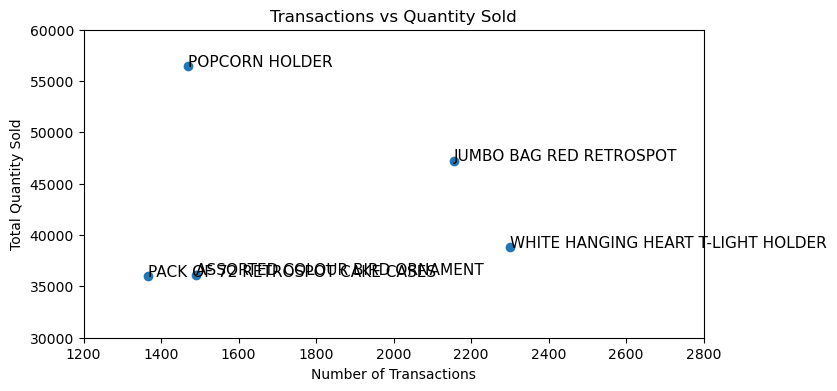

In [15]:
plt.figure(figsize=(8,4)) 
plt.scatter(comparison_sold['Amount'], comparison_sold['Quantity']) 
for i, row in comparison_sold.iterrows(): 
    plt.text(row['Amount'], row['Quantity'], row['Description'], fontsize=11) 

plt.xlabel('Number of Transactions') 
plt.ylabel('Total Quantity Sold') 
plt.ylim(30000,60000)
plt.xlim(1200,2800)
plt.title('Transactions vs Quantity Sold') 
plt.show()


Based on this visual, the company need to focus on 2 main products: popcorn holders and white hanging heart t-light holders. 

Popcorn holders are the most sold product yet there is fewer than 1500 transactions meaning that the product needs to be advertised more thoroughly to increase visibility which will allow the product to increase the number of transactions. 

White hanging heart t-light holders are the opposite where number of transactions surplus the amount of this item sold. This item needs to sold in bulks using promotional deals to increase the amount of this item sold. 

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].dt.year.min(), df['InvoiceDate'].dt.year.max()
#from which years our data ranges from


(2010, 2011)

In [17]:
df.groupby(df['InvoiceDate'].dt.year)['InvoiceDate'].apply(lambda x: x.dt.month.unique())



InvoiceDate
2010                                       [12]
2011    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Name: InvoiceDate, dtype: object

Analysis between two years is not possible as months of January to November of 2010 are not shown in the data set. Only months of December can be used for comparisons between the two years in which we will dive deeply and analyse any noticeable changes. As 2010 is an incomplete year, we will mostly be looking at 2011 during this analysis.

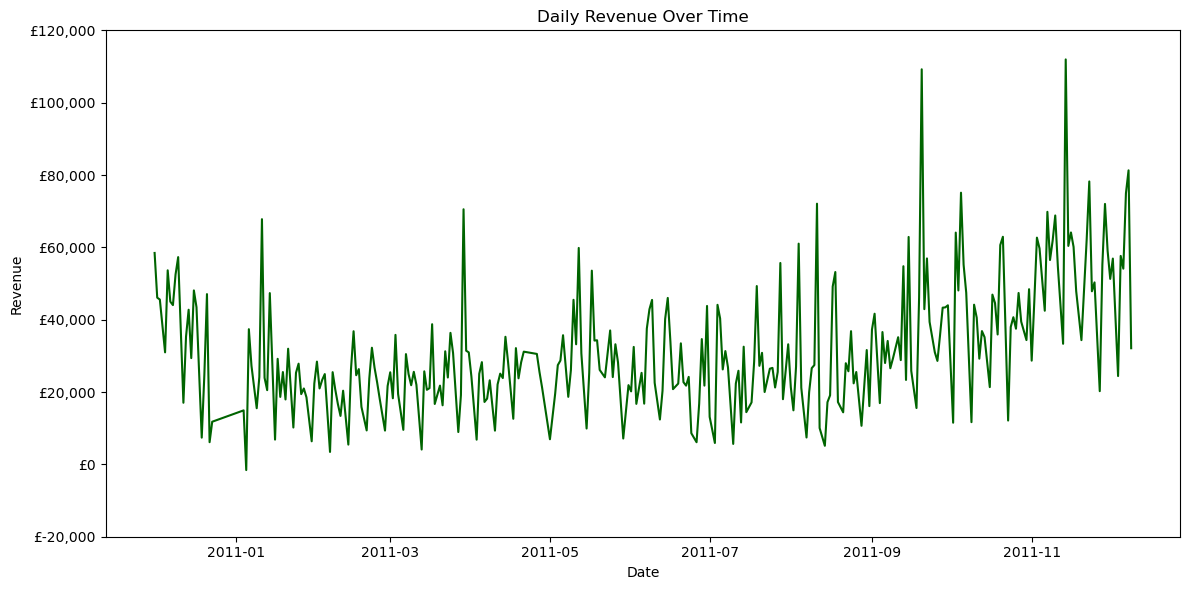

In [18]:
daily_revenue = (
      df.groupby(df['InvoiceDate'].dt.date)
      .agg(Daily_Revenue=('Revenue', 'sum'))
      .reset_index()
)
daily_revenue.columns = ['Date', 'Daily_Revenue']

plt.figure(figsize=(12,6))
plt.plot(daily_revenue['Date'], daily_revenue['Daily_Revenue'], color= 'darkgreen')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
yticks = plt.yticks()[0]
formatted_yticks = [f"£{int(y):,}" for y in yticks]
plt.yticks(yticks, formatted_yticks)
plt.tight_layout()
plt.show()

This chart shows the daily revenue over time in the data set and how it changes. There are many fluctuations over time with high peaks and dips, where some days there are negative revenue in particular the start of January of 2011. This can be possibly due to returns,refunds or wastage. Generally daily revenue trend is consistent up until October 2011, during the end period of 2011 there are huge revenue spikes which exceed over £100,000. Monthly revenue analysis needs to occur to see any changes in revenue overtime.

In [19]:
monthly_revenue = (
    df.assign( YearMonth=df['InvoiceDate'].dt.to_period('M'))     
    .groupby('YearMonth')
    .agg(Monthly_Revenue=('Revenue', 'sum'))
    .reset_index()
)

monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)
monthly_revenue_table = monthly_revenue.copy()

monthly_revenue_table['Monthly_Revenue'] = (
    monthly_revenue_table['Monthly_Revenue']
    .map(lambda x: f"£{x:,.2f}")
)

monthly_revenue_table

,YearMonth,Monthly_Revenue
0,2010-12,"£746,723.61"
1,2011-01,"£558,448.56"
2,2011-02,"£497,026.41"
3,2011-03,"£682,013.98"
4,2011-04,"£492,367.84"
5,2011-05,"£722,079.25"
6,2011-06,"£689,977.23"
7,2011-07,"£680,156.99"
8,2011-08,"£681,386.46"
9,2011-09,"£1,017,592.78"


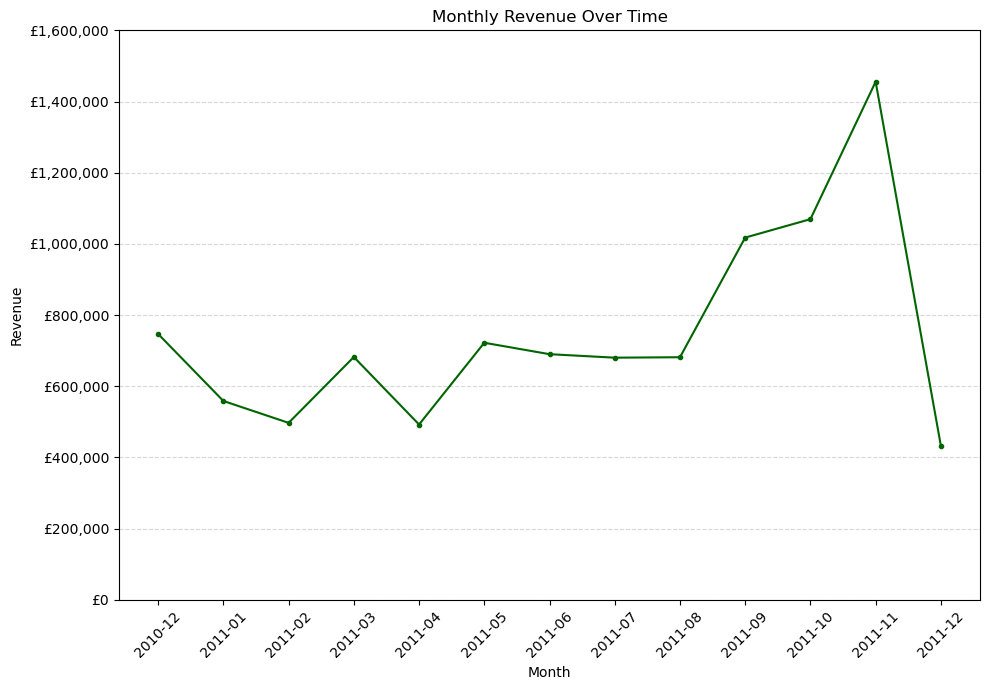

In [20]:
plt.figure(figsize=(10,7))

plt.plot(
    monthly_revenue['YearMonth'],
    monthly_revenue['Monthly_Revenue'],
    color='darkgreen',
    marker='.'
    
)

plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.ylim(0)

yticks = plt.yticks()[0]
formatted_yticks = [f"£{int(y):,}" for y in yticks]
plt.yticks(yticks, formatted_yticks)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Monthly revenue trend analysis is important to carry out to identify how the company performed over the year and to see which months have particularly struggled. Overall, the monthly trend is consistent and stays within the threshold of £490,000-£750,000. From the months of September-November 2011 the company exceeds over £1,000,000 which is a significant increase of approximately 30% compared to its peak months. This can be due to the winter season as Christmas is approaching it is commonly known that more purchases occur during this time. We see there is a sharp decline in sales in the following month as revenue plummeted to an all time low of £432,701 compared to the other months which is irregular as daily revenue during this time doesn't seem to have any inconsistencies. We will now do some further analysis to understand why revenue plummeted in this month compared to other months.

In [21]:
dec_2011 = df[
    (df['InvoiceDate'].dt.year == 2011) &
    (df['InvoiceDate'].dt.month == 12)
]

daily_revenue_dec_2011 = (
    dec_2011
    .groupby(dec_2011['InvoiceDate'].dt.date)
    .agg(Daily_Revenue=('Revenue', 'sum'))
    .reset_index()   
)
daily_revenue_dec_2011.columns = ['Date', 'Daily_Revenue']
daily_revenue_dec_2011


,Date,Daily_Revenue
0,2011-12-01,51282.33
1,2011-12-02,56898.47
2,2011-12-04,24421.82
3,2011-12-05,57630.20
4,2011-12-06,54109.39
5,2011-12-07,74952.61
6,2011-12-08,81294.33
7,2011-12-09,32111.91


It is clear that there are missing dates in December with no recorded revenue after the 9th. This gap can be due to one of 2 possible reasons: the company decided to close early for Christmas and New years holidays or the sales dataset itself ended on the 9th of December. Based on the daily revenue of December we can calculate the forecasted revenue  for the month and this would approximate to £1,200,000. This means there is no major inconsistency of monthly revenue in this month. 

In [22]:
uk_df= df.query(
    "Country=='United Kingdom' and CustomerID !=0").copy(
)
uk_df['Date']= uk_df['InvoiceDate'].dt.to_period('M')
uk_monthly=(
    uk_df
    .groupby('Date')
    .agg(
        Customers=('CustomerID', 'nunique'),
        Orders=('InvoiceNo', 'nunique'),
        Revenue=('Revenue', 'sum')
    )
    .reset_index()
)
uk_monthly['Purchasing Frequency'] =(
    uk_monthly['Orders'] / uk_monthly['Customers']
)
uk_monthly['Average Order Value']=(
      uk_monthly['Revenue'] / uk_monthly['Orders']
)
uk_monthly

,Date,Customers,Orders,Revenue,Purchasing Frequency,Average Order Value
0,2010-12,871,1572,481675.230,1.804822,306.409179
1,2011-01,684,1091,350668.800,1.595029,321.419615
2,2011-02,714,1072,347856.550,1.501401,324.493050
3,2011-03,923,1442,455534.070,1.562297,315.904348
4,2011-04,817,1264,375919.231,1.547124,297.404455
5,2011-05,985,1666,524349.030,1.691371,314.735312
6,2011-06,943,1536,471386.360,1.628844,306.892161
7,2011-07,899,1439,460082.891,1.600667,319.724038
8,2011-08,867,1358,475752.950,1.566321,350.333542
9,2011-09,1177,1848,774616.402,1.570093,419.164720


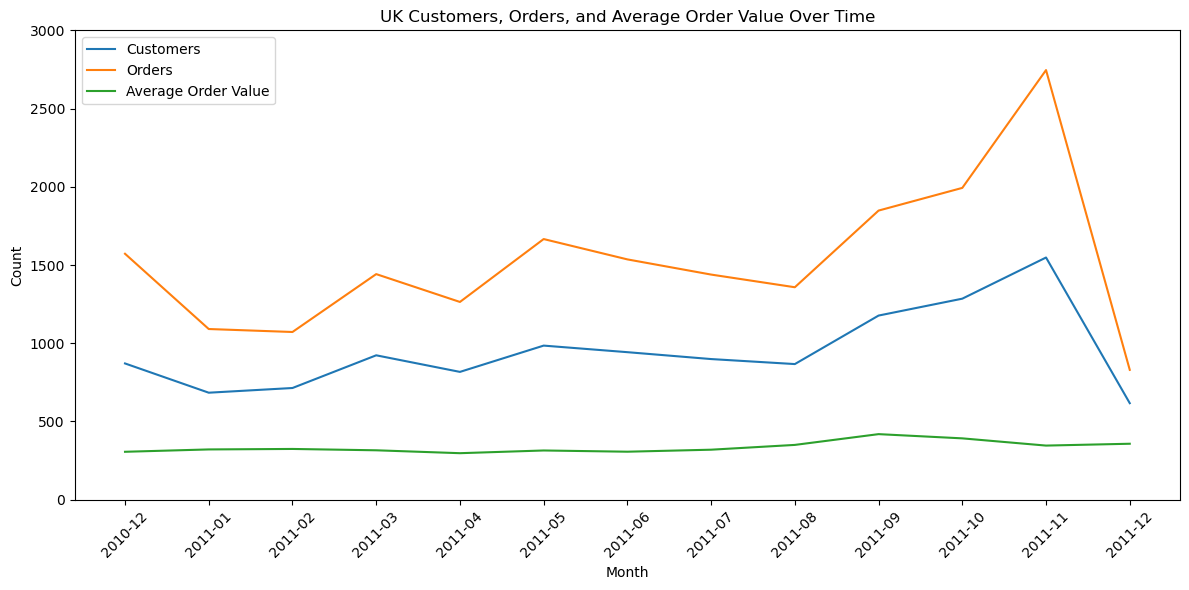

In [23]:
dates = uk_monthly['Date'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(dates, uk_monthly['Customers'], label='Customers')
plt.plot(dates, uk_monthly['Orders'], label='Orders')
plt.plot(dates, uk_monthly['Average Order Value'], label='Average Order Value')
plt.xlabel('Month')
plt.title('UK Customers, Orders, and Average Order Value Over Time')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.ylim(0,3000)
plt.legend()
plt.tight_layout()
plt.show()


Customers and orders have a strong positive correlation as shown from their parallel movement in fluctuations. Meanwhile, average order value remains consistent throughout any fluctuations. This indicates that fluctuations in sales are based on the changes in customer numbers. Therefore, customer retention and acquisition are key drivers on revenue growth and is critical for this company.

In [24]:
uk_2011 = df.query(
    "Country == 'United Kingdom' and CustomerID != 0 and InvoiceDate.dt.year == 2011"
)

uk_2011 = uk_2011.assign(
    Quarter='Q' + uk_2011['InvoiceDate'].dt.quarter.astype(str)
)
quarterly_customer_orders= (
    uk_2011
    .groupby(['Quarter', 'CustomerID'])
    .agg(Number_of_Orders=('InvoiceNo', 'nunique'))
    .reset_index()
)
quarterly_customer_orders['Customer Type'] = quarterly_customer_orders['Number_of_Orders'].apply(
    lambda x: 'New' if x < 5 else ('Loyal' if x > 10 else 'Repeat')
)
quarterly_customer = (
    quarterly_customer_orders
    .groupby(['Quarter', 'Customer Type'])
        .size()
    .reset_index(name='Number of Customers')
)
quarterly_customer


,Quarter,Customer Type,Number of Customers
0,Q1,Loyal,26
1,Q1,New,1480
2,Q1,Repeat,122
3,Q2,Loyal,37
4,Q2,New,1626
5,Q2,Repeat,165
6,Q3,Loyal,32
7,Q3,New,1758
8,Q3,Repeat,180
9,Q4,Loyal,30


In [25]:
ukcustomer_table = (
    uk_2011
    .groupby('CustomerID')
    .agg(
        Orders=('InvoiceNo', 'nunique'),
        Revenue=('Revenue', 'sum')
    )
    .reset_index()
)
ukcustomer_table['Customer Type'] = ukcustomer_table['Orders'].apply(
    lambda x: 'New' if x < 5 else ('Loyal' if x > 10 else 'Repeat')
)
ukcustomer_type_table = (
    ukcustomer_table
    .groupby('Customer Type')
    .agg(
        Customers=('CustomerID', 'nunique'),
        Revenue=('Revenue', 'sum'),
        Orders=('Orders', 'sum')
    )
    .reset_index()
)

ukcustomer_type_table['Average Revenue Per Customer'] = (
    ukcustomer_type_table['Revenue'] / ukcustomer_type_table['Customers']
)
ukcustomer_type_table['Average Order Value'] = (
    ukcustomer_type_table['Revenue'] / ukcustomer_type_table['Orders']
)
ukcustomer_type_table

,Customer Type,Customers,Revenue,Orders,Average Revenue Per Customer,Average Order Value
0,Loyal,364,3217427.200,7738,8839.085714,415.795709
1,New,2679,1489501.963,5259,555.991774,283.229124
2,Repeat,792,1557996.011,5288,1967.166681,294.628595


We assumed that if a customer has placed more than 5 orders in separate transactions they are likely to be a repeat customer and if they placed 10 orders they are loyal.
New customers contribute to the largest customer segment which was expected and generate the lowest revenue on average. Whilst loyal customer segment is completely the opposite and greatly contribute to total revenue as the average customer spends nearly 16 times more than the average customer in the new segment. Repeat customer segment sits in between these 2 customer segments in both its customer size and average revenue per customer. 

When comparing average order value we can see both new and repeat customer types are very similar, this indicates that the increased revenue generated was caused from the higher frequency of purchases. Loyal customers greatly exceed the order value by over £100 more and generate the greatest value for the company. Therefore, the business should prioritise and focus on retaining and acquiring loyal customers as they generate the most value to the company.

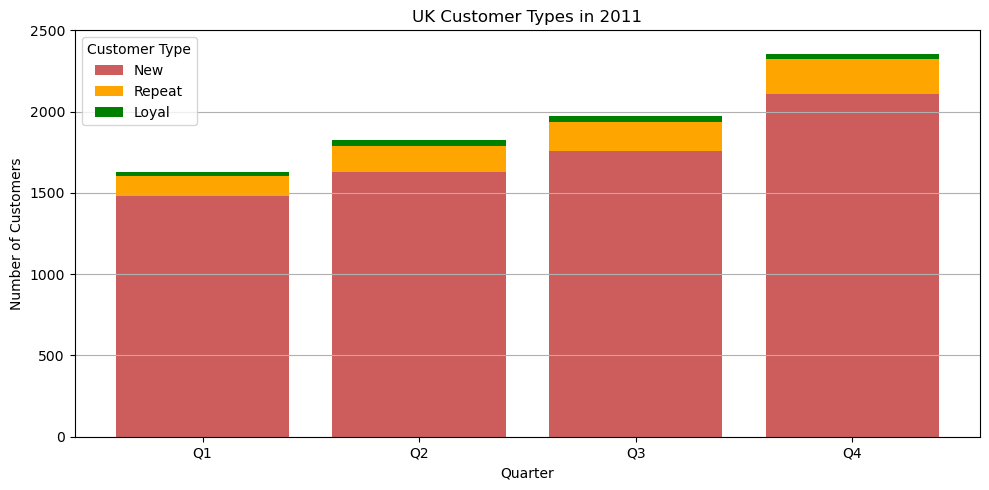

In [26]:
quarter_count = (
    quarterly_customer_orders
    .groupby(['Quarter', 'Customer Type'])
    .size()
    .unstack(fill_value=0)
    .reindex(['Q1', 'Q2', 'Q3', 'Q4'])
)
plt.figure(figsize=(10,5))

plt.bar(
    quarter_count.index,
    quarter_count['New'], 
    label='New',
    color='indianred'
)
plt.bar(
    quarter_count.index,
    quarter_count['Repeat'],
    bottom=quarter_count['New'],
    label='Repeat',
    color='orange'
    
)
plt.bar(
    quarter_count.index,
    quarter_count['Loyal'],
    bottom=quarter_count['New'] + quarter_count['Repeat'],
    label='Loyal',
    color='green'
)

plt.title('UK Customer Types in 2011')
plt.xlabel('Quarter')
plt.ylabel('Number of Customers')
plt.ylim(0,2500)
plt.legend(title='Customer Type')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.tight_layout()
plt.show()


The trend per quarter is very similar we see an increase with new customers with little to no difference to the other customer segments we have identified. The amount of new customers per quarter increases especially during quarter 4 which likely caused the 
Repeat and loyal customers have lower acquisition costs as it is cheaper to retain existing customers over new customers. Ideally, you want to transition customers step by step from new to repeat to loyal to maximise revenue. We see during 2011 that this has not been done effectively, so the recommendation is to use a step by step approach by transition new customers into repeat customers and hopefully into loyal customers. This can be done by starting a customer rewards or loyalty programmes to encourage customers to shop more frequently at their store. 

In [27]:
orders_by_country = (
    df.groupby('Country')['InvoiceNo']
      .nunique()
      .reset_index(name='Number of Orders')
      .sort_values('Number of Orders', ascending=False)

)
total_revenue_by_country=(
    df.groupby('Country')['Revenue'].sum()
)
customer_country=(
    df.groupby('Country')['CustomerID']
    .nunique()
    .reset_index()
    .rename(columns={'CustomerID':'Customers'})
    .sort_values('Customers',ascending=False)
)
country_comparison = orders_by_country.merge(
    total_revenue_by_country,
    on='Country'
)
country_comparison=country_comparison.merge(
    customer_country,
    on='Country',

)
country_comparison['Average Order Value'] = (country_comparison['Revenue'] / 
                                             country_comparison['Number of Orders']
                                            )


country_comparison.head(10)




,Country,Number of Orders,Revenue,Customers,Average Order Value
0,United Kingdom,23494,8166572.434,3951,347.602470
1,Germany,603,221509.470,95,367.345721
2,France,461,197317.110,88,428.019761
3,Ireland,360,262993.380,4,730.537167
4,Belgium,119,40910.960,25,343.789580
5,Spain,105,54756.030,31,521.486000
6,Netherlands,101,284661.540,9,2818.431089
7,Switzerland,74,56363.050,22,761.662838
8,Portugal,71,29302.970,20,412.717887
9,Australia,69,137009.770,9,1985.648841


From this data it is clear to us that this company is based in the UK so a country analysis excluding UK is important to analyse. This is to identify which countries the company should prioritise with its exports.


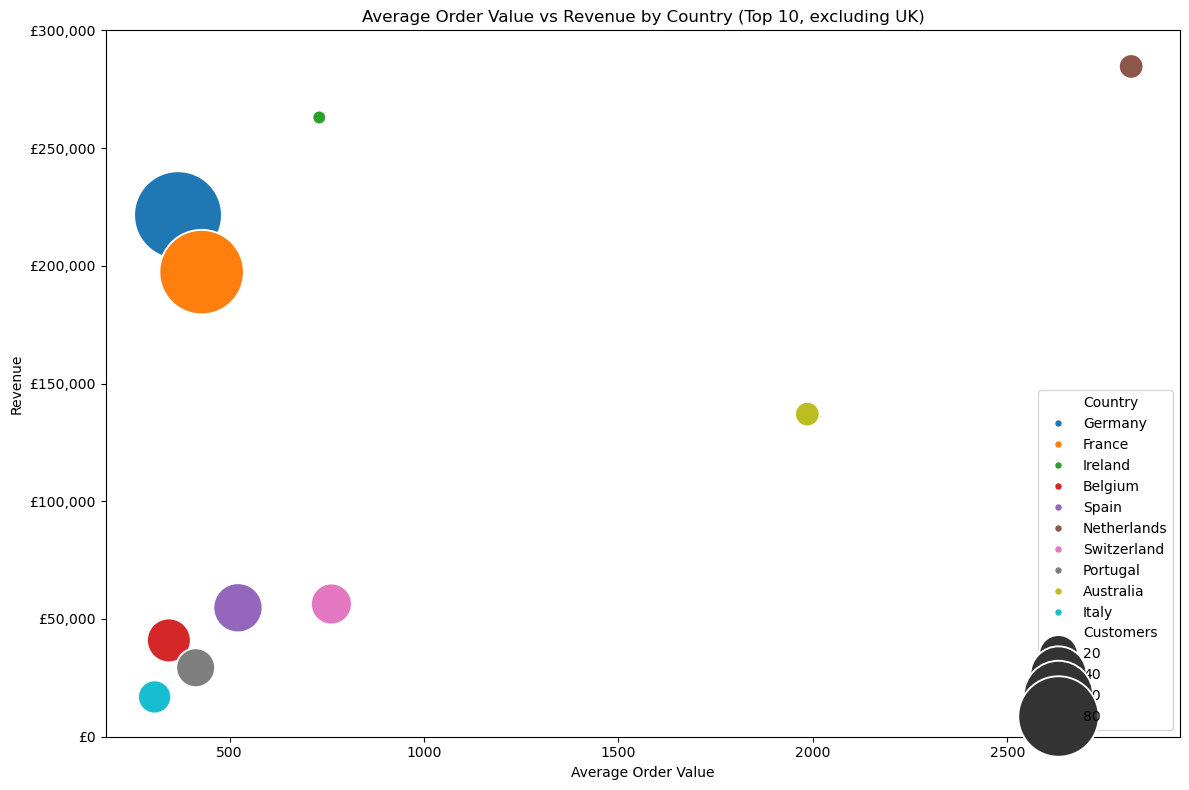

In [28]:
country_comparison_wouk=country_comparison.query("Country != 'United Kingdom'")
plt.figure(figsize=(12,8)) 
sns.scatterplot( data=country_comparison_wouk.head(10),
                 x='Average Order Value',
                 y='Revenue', 
                 hue='Country', 
                 size='Customers',
                 sizes=(100,4000),
                 alpha=1,
)

plt.title('Average Order Value vs Revenue by Country (Top 10, excluding UK)')
plt.xlabel('Average Order Value') 
plt.ylabel('Revenue') 
yticks = plt.yticks()[0] 
formatted_yticks = [f"£{int(y):,}" for y in yticks]
plt.yticks(yticks, formatted_yticks) 
plt.tight_layout() 
plt.show()

Generally speaking the bigger the bubble, the less the company has to rely on few customers. The company should focus its attentions to the highest revenue countries with highest order value such as Netherlands and Ireland . The priority should be to focus on expanding its customer base in these countries as these countries bring in the most revenue from very few customers. 


In [29]:
country_product= (
    df.groupby(['Country', 'Description'], as_index=False)
      .agg(Quantity=('Quantity', 'sum'))
)

most_sold_product_by_country = (
    country_product
    .sort_values(['Country', 'Quantity'], ascending=[True, False])
    .groupby('Country')
    .head(1)
)

most_sold_product_by_country.head(5)

,Country,Description,Quantity
274,Australia,MINI PAINT SET VINTAGE,2916
843,Austria,SET 12 KIDS COLOUR CHALK STICKS,288
911,Bahrain,ICE CREAM SUNDAE LIP GLOSS,96
1335,Belgium,PACK OF 72 RETROSPOT CAKE CASES,480
1700,Brazil,DOLLY GIRL LUNCH BOX,24


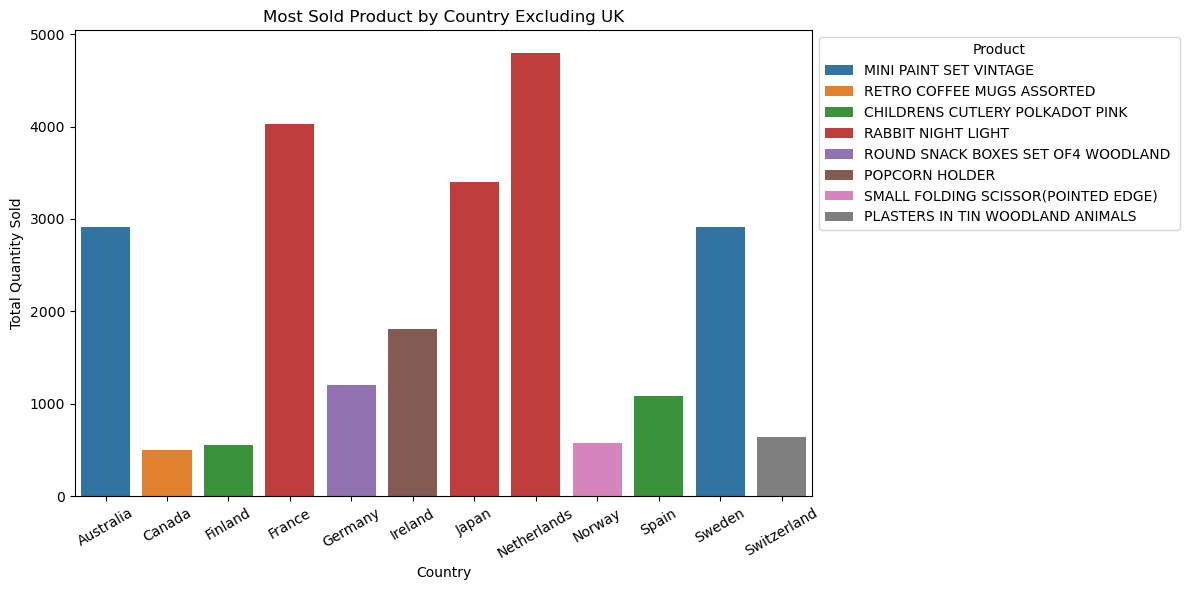

In [30]:
most_sold_product_by_country_filtered = (
    most_sold_product_by_country
    .query(" Country != 'United Kingdom' and Quantity > 500")
)


plt.figure(figsize=(12, 6))
sns.barplot(
    data=most_sold_product_by_country_filtered, 
    x='Country', 
    y='Quantity', 
    hue='Description',
   

)
plt.xticks(rotation=30)
plt.title('Most Sold Product by Country Excluding UK')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Product', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Country')

plt.tight_layout()
plt.show()


Products that are sold most in each country is very important to identify to manage inventory levels effectively and to understand consumer demand of each product. This insight can help the company reduce costs of inventory management through lowering shipping expenses and storage costs. The marketing department can be given this information which is vital for them to budget more effectively. Through this they are likely able to gain a higher ROI on advertisement which in turn can generate further sales of those specific products. For example, using this visual we can identify that the rabbit night light product are most popular in 3 different countries so the marketing team in essence can increase their spend on advertisement and promotions of this product in those specific countries which should lead to further sales.   


Conclusion:

In conclusion, this analysis is very important to the field of retail analysis as the analysis done here can be applied to any business that conducts sales. We have discussed top performing products, revenue contributions in both the UK and export countries overtime and the different customer segments that exist within our data set. 

Limitations:

The limitations within the data set are the following:

- The data set only included 2011 and one month of 2010, a true time series analysis include multiple years which would increase reliability.
- Only a single retail data set was used, so we can't compare how well it is performing compared to other similar markets. It would be more beneficial to conduct the same analysis on multiple other retail data sets.
- More detailed customer characteristics such as age would be useful to segment customers even further to identify further trends. 

References: 

Bradlow, E.T., Gangwar, M., Kopalle, P. and Voleti, S. (2017) The role of big data and predictive analytics in retailing, Journal of Retailing, 93(1), pp. 79–95.

Chakma, S., Chakma, G. and Chakma, R. (2025) Statistical insights and exploratory data analysis for e-commerce sales data: A collaborative filtering and recency-based recommendation system, International Journal of Business and Management, 20(5), pp. 258–272.

ulrikthygepedersen. (2022) Online Retail Dataset [dataset]. Kaggle. Available at: https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset 
